In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [9]:
data = pd.read_csv('/Users/Admin/Desktop/country_data.csv')

In [10]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.shape

(167, 10)

In [17]:
print(data.corr(), '\n')

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  

C:\Users\Admin\AppData\Local\Temp\ipykernel_34832\187856483.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr(), '\n')


In [18]:
data = data.dropna (axis = 0)

In [19]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


C:\Users\Admin\AppData\Local\Temp\ipykernel_34832\3967937156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


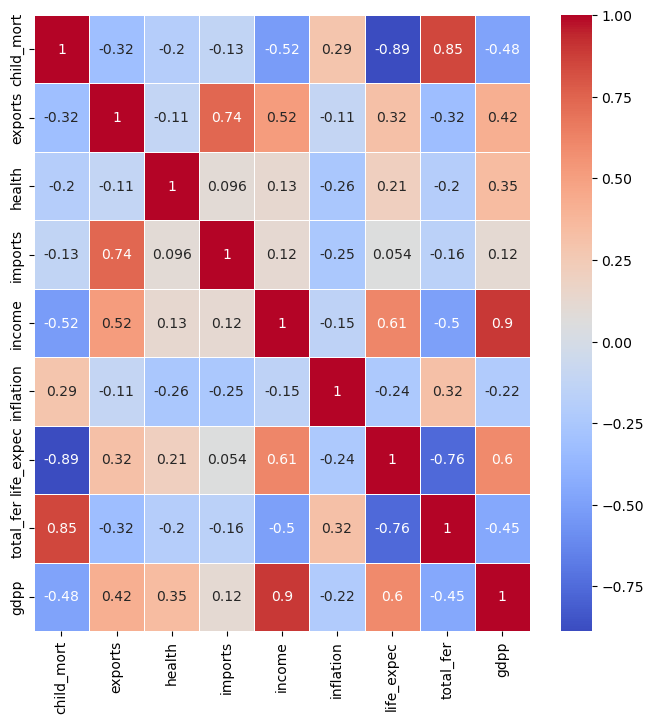

In [21]:
correlation_matrix = data.corr()
plt.figure(figsize= (8,8))
sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm', linewidths = 0.5)
plt.show()

In [156]:
X = data.iloc[:,[1,3]].values

In [157]:
# contruct the model (either k-means or mean shift)
model = KMeans(n_clusters = 2, n_init='auto', random_state=5)
#model = MeanShift()
model.fit(X)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=5)

In [158]:
cluster_centers = model.cluster_centers_

In [159]:
# print the centre positions of the clusters
centers = model.cluster_centers_
print('Centroids:', centers, '\n')

Centroids: [[96.45        6.1025    ]
 [17.45772358  7.07081301]] 



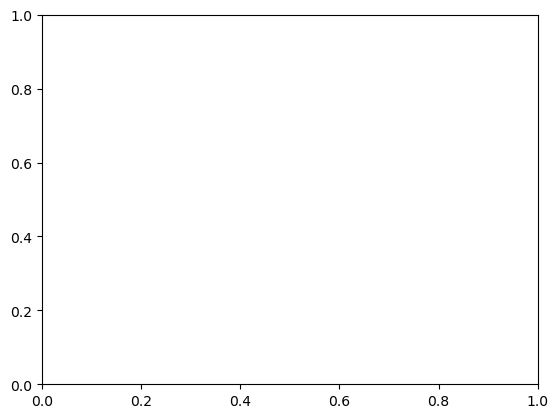

In [160]:
#Visualise the result
fig, ax = plt.subplots()

In [161]:
# store the normalisation of the color encodings
# based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centers)-1)

In [162]:
# plot the clustered data
scatter1 = ax.scatter(X[:, 0], X[:, 1],
c = model.predict(X), s = 50, cmap = 'plasma', norm = nm)

In [163]:
# plot the centroids using a for loop
for i in range(centers.shape[0]):
    ax.text(centers[i, 0], centers[i, 1], str(i), c = 'black',
bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))

In [164]:
# make sure you choose the correct column names here!!!
ax.set_xlabel(data.columns[2])
ax.set_ylabel(data.columns[4])

Text(4.444444444444452, 0.5, 'imports')

In [165]:
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
loc="upper right", title="Clusters Visualization")
ax.add_artist(legend1)
fig.savefig('cluster1_plot.png')


In [109]:
#Include as many features as you can. Does the clustering change?
X = data.iloc[:,[1,3,6]].values

In [110]:
# contruct the model (either k-means or mean shift)
model = KMeans(n_clusters = 4, n_init='auto', random_state=5)
#model = MeanShift()
model.fit(X)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=5)

In [111]:
cluster_centers = model.cluster_centers_

In [114]:
# print the centre positions of the clusters
centers = model.cluster_centers_
print('Centroids:', centers, '\n')

Centroids: [[155.66666667   6.42833333  23.23666667]
 [ 12.27669903   7.25067961   5.79606796]
 [ 97.88461538   6.32115385  10.19096154]
 [ 51.4875       5.89         9.3183125 ]] 



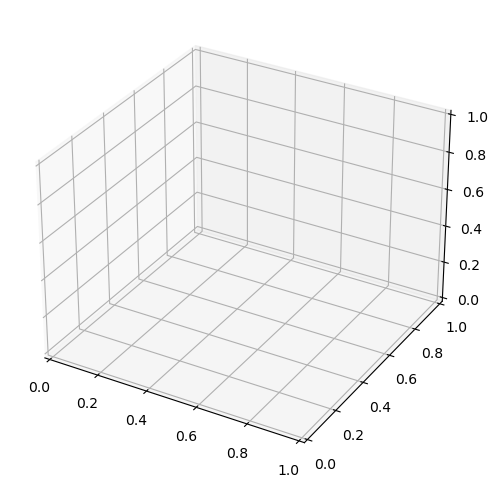

In [115]:
#Visualise the result in a 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

In [168]:
# store the normalisation of the color encodings
# based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centers)-1)

In [169]:
# plot the clustered data
scatter1 = ax.scatter(X[:, 0], X[:, 1], X[:,2],
c = model.predict(X), s = 50, cmap = 'plasma', norm = nm)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
# plot the centroids using a for loop
for i in range(centers.shape[0]):
    ax.text(centers[i, 0], centers[i, 1], centers[i, 2],
str(i), c = 'black',
bbox=dict(boxstyle="round", facecolor='white',
edgecolor='black'))
ax.azim = -60
ax.dist = 10
ax.elev = 10
# make sure you choose the correct column names here!!!
ax.set_xlabel(data.columns[2])
ax.set_ylabel(data.columns[4])
ax.set_zlabel(data.columns[9])
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
loc="center left", title="Clusters")
ax.add_artist(legend1)
fig.tight_layout(pad=-2.0)
fig.savefig('cluster_3Dplot.png')